### Check if ML data from MOM6 looks great

In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from datatree import DataTree
from datatree import open_datatree

import xgcm

In [2]:
data_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day/'

In [15]:
ds_HR = xr.open_zarr(f'{data_bucket}prog.zarr').chunk({'xh':-1,'yh':-1})

In [22]:
ds_50km = xr.open_zarr(f'{data_bucket}ml_data_'+'50'+'km.zarr').chunk({'xh':-1,'yh':-1})
ds_100km = xr.open_zarr(f'{data_bucket}ml_data_'+'100'+'km.zarr').chunk({'xh':-1,'yh':-1})
ds_200km = xr.open_zarr(f'{data_bucket}ml_data_'+'200'+'km.zarr').chunk({'xh':-1,'yh':-1})
ds_400km = xr.open_zarr(f'{data_bucket}ml_data_'+'400'+'km.zarr').chunk({'xh':-1,'yh':-1})

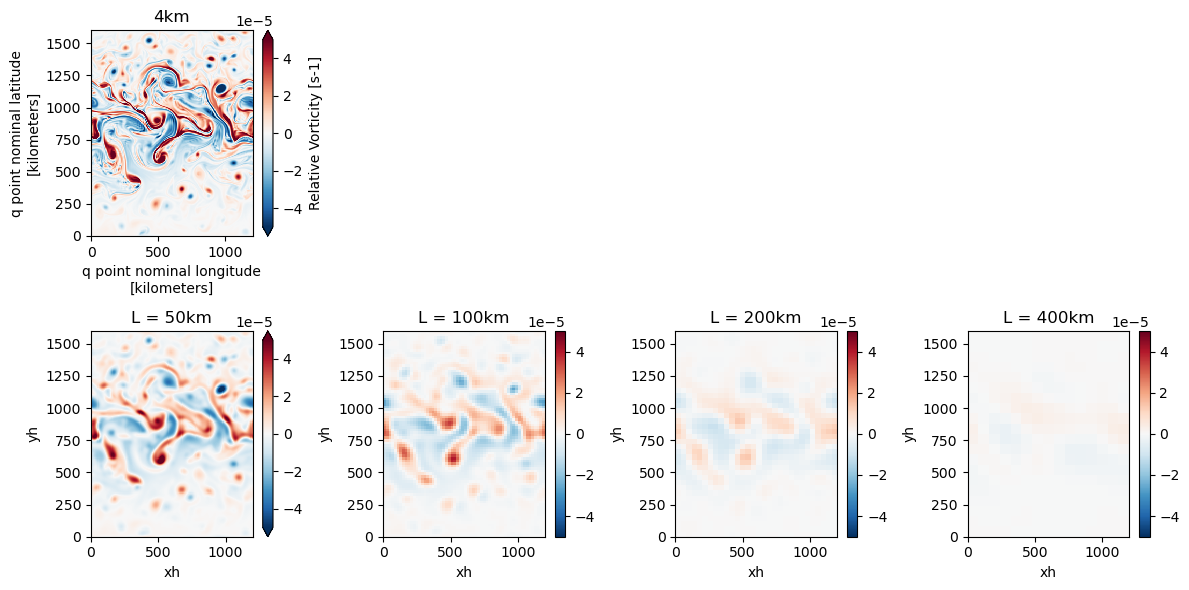

In [5]:
plt.figure(figsize=(12, 6))
vmin = -5e-5

plt.subplot(241)
ds_HR.RV.isel(Time=-1, zl=0).plot(vmin=vmin)
plt.title('4km')

plt.subplot(245)
RV = ds_50km.dvdx - ds_50km.dudy
RV.isel(Time=-1, zl=0).plot(vmin=vmin)
plt.title('L = 50km')

plt.subplot(246)
RV = ds_100km.dvdx - ds_100km.dudy
RV.isel(Time=-1, zl=0).plot(vmin=vmin)
plt.title('L = 100km')

plt.subplot(247)
RV = ds_200km.dvdx - ds_200km.dudy
RV.isel(Time=-1, zl=0).plot(vmin=vmin)
plt.title('L = 200km')

plt.subplot(248)
RV = ds_400km.dvdx - ds_400km.dudy
RV.isel(Time=-1, zl=0).plot(vmin=vmin)
plt.title('L = 400km')

plt.tight_layout()

In [6]:
def compute_overturning_metrics(ds_filt): 
    dx = ds_filt.xh.diff('xh')[0].values*1e3
    m3_to_Sv = 1e-6
    
    ds_filt['Vbar_LS'] = ds_filt['vbar_hbar'].sum('xh')*m3_to_Sv*dx
    ds_filt['Vbar_SS'] = ds_filt['vh_sg'].sum('xh')*m3_to_Sv*dx
    
    return ds_filt

In [7]:
ds_50km = compute_overturning_metrics(ds_50km)
ds_100km = compute_overturning_metrics(ds_100km)
ds_200km = compute_overturning_metrics(ds_200km)
ds_400km = compute_overturning_metrics(ds_400km)

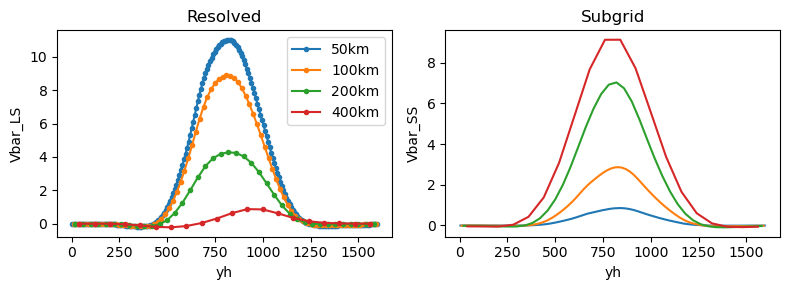

In [8]:
plt.figure(figsize=(8,3))

plt.subplot(121)
ds_50km.Vbar_LS.mean('Time').isel(zl=0).plot(label='50km',marker='.')
ds_100km.Vbar_LS.mean('Time').isel(zl=0).plot(label='100km',marker='.')
ds_200km.Vbar_LS.mean('Time').isel(zl=0).plot(label='200km',marker='.')
ds_400km.Vbar_LS.mean('Time').isel(zl=0).plot(label='400km',marker='.')
plt.legend()
plt.title('Resolved')

plt.subplot(122)
ds_50km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_100km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_200km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_400km.Vbar_SS.mean('Time').isel(zl=0).plot()
plt.title('Subgrid')

plt.tight_layout()

Looks good. 

In [28]:
import xrft
def calc_Vps(ds, var='v', ydim='yq'):

    data = ds[var]
    sp = xrft.power_spectrum(data, dim='xh')
    sp_av = sp.isel(zl=0).sel({ydim:slice(400, 1200)}).mean(ydim).isel(Time=slice(-30,None)).mean('Time')
    
    return sp_av

Text(0.5, 0, 'k [km$^{-1}$]')

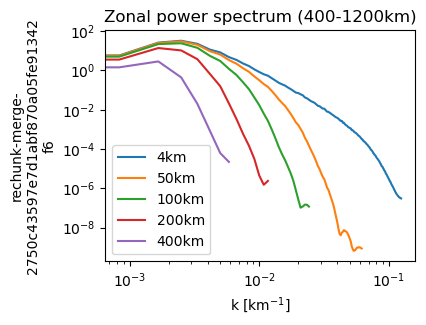

In [29]:
plt.figure(figsize=(4,3))

calc_Vps(ds_HR).plot(label='4km')
calc_Vps(ds_50km, ydim='yh').plot(label='50km')
calc_Vps(ds_100km, ydim='yh').plot(label='100km')
calc_Vps(ds_200km, ydim='yh').plot(label='200km')
calc_Vps(ds_400km, ydim='yh').plot(label='400km')


#calc_Vps(ds_30km).plot(label='30km')
#calc_Vps(ds_40km).plot(label='40km')


plt.xscale('log')
plt.yscale('log')
plt.title('Zonal power spectrum (400-1200km)')
plt.legend()
plt.xlabel(r'k [km$^{-1}$]')

Text(0.5, 0, 'k [km$^{-1}$]')

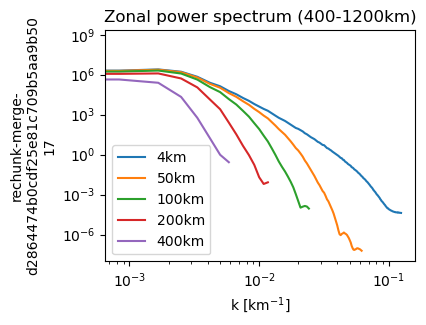

In [30]:
plt.figure(figsize=(4,3))

calc_Vps(ds_HR, var='h', ydim='yh').plot(label='4km')
calc_Vps(ds_50km, var='h',ydim='yh').plot(label='50km')
calc_Vps(ds_100km,var='h', ydim='yh').plot(label='100km')
calc_Vps(ds_200km, var='h',ydim='yh').plot(label='200km')
calc_Vps(ds_400km,var='h', ydim='yh').plot(label='400km')


#calc_Vps(ds_30km).plot(label='30km')
#calc_Vps(ds_40km).plot(label='40km')


plt.xscale('log')
plt.yscale('log')
plt.title('Zonal power spectrum (400-1200km)')
plt.legend()
plt.xlabel(r'k [km$^{-1}$]')